In [ ]:
%matplotlib inline


# Label image regions


This example shows how to segment an image with image labelling. The following
steps are applied:

1. Thresholding with automatic Otsu method
2. Close small holes with binary closing
3. Remove artifacts touching image border
4. Measure image regions to filter small objects




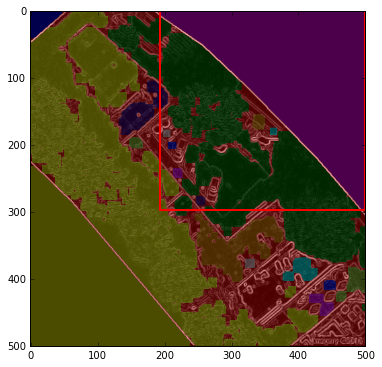

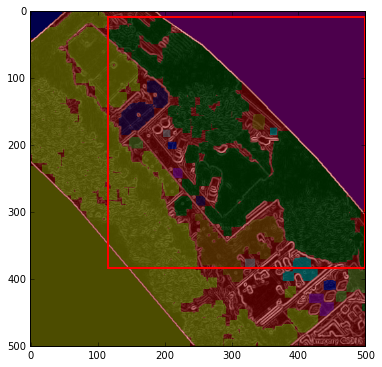

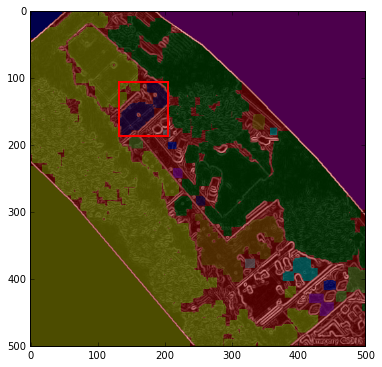

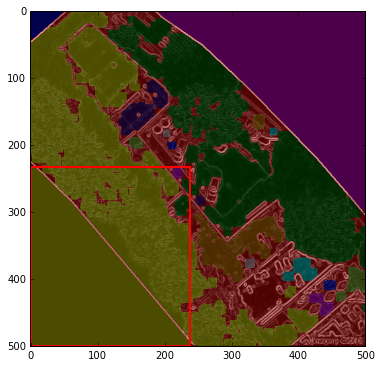

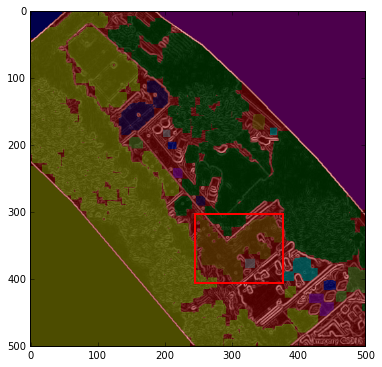

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage import util 
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square, skeletonize
from skimage.measure import regionprops
from skimage.color import label2rgb


def grayscale(rgb):
    if len(rgb.shape) < 3:
      return rgb
    
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

image = grayscale(plt.imread("../lot_detector/samples/satellite_edge_20.png"))
total_area = image.shape[0] * image.shape[1]

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(11))
cleared = bw.copy()
clear_border(cleared)

cleared = ~cleared

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

for region in regionprops(label_image):
    minr, minc, maxr, maxc = region.bbox
    area = (maxc - minc) * (maxr - minr)
    
#     skip small images
    if area < (total_area * 0.02) or area > (total_area * 0.7):
        continue

    # draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
    ax.imshow(image_label_overlay, cmap=plt.cm.gray)
    ax.add_patch(rect)

plt.show()